NLP MODEL TO PERFORM SENTIMENT ANAYSIS on social media posts or product reviews

In [20]:
import nltk
import re
import pandas as pd
from nltk.corpus import movie_reviews, stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
nltk.download('movie_reviews')
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(reviews, columns=['review', 'sentiment'])
df['review'] = df['review'].apply(lambda x: ' '.join(x))


In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['review'] = df['review'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

         neg       0.82      0.81      0.82       199
         pos       0.82      0.83      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

Confusion Matrix:
[[162  37]
 [ 35 166]]


In [13]:
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(reviews, columns=['review', 'sentiment'])
df['review'] = df['review'].apply(lambda x: ' '.join(x))

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['review'] = df['review'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

new_reviews = ["I loved this movie, it was fantastic!", "I hated this movie, it was terrible."]
new_reviews_preprocessed = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_preprocessed)
predictions = model.predict(new_reviews_tfidf)

for review, sentiment in zip(new_reviews, predictions):
    print(f'Review: {review} => Sentiment: {sentiment}')


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

         neg       0.82      0.81      0.82       199
         pos       0.82      0.83      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

Confusion Matrix:
[[162  37]
 [ 35 166]]
Review: I loved this movie, it was fantastic! => Sentiment: pos
Review: I hated this movie, it was terrible. => Sentiment: neg


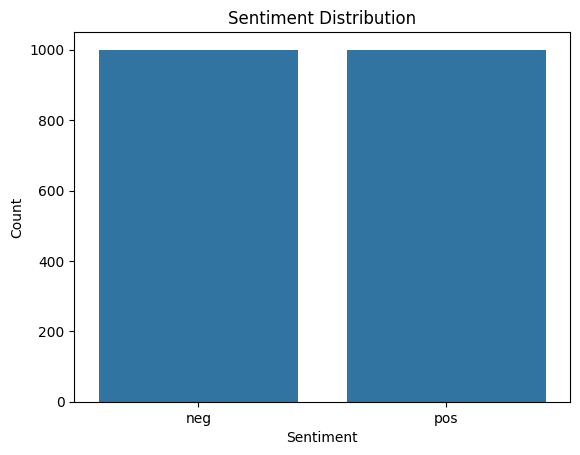

In [14]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


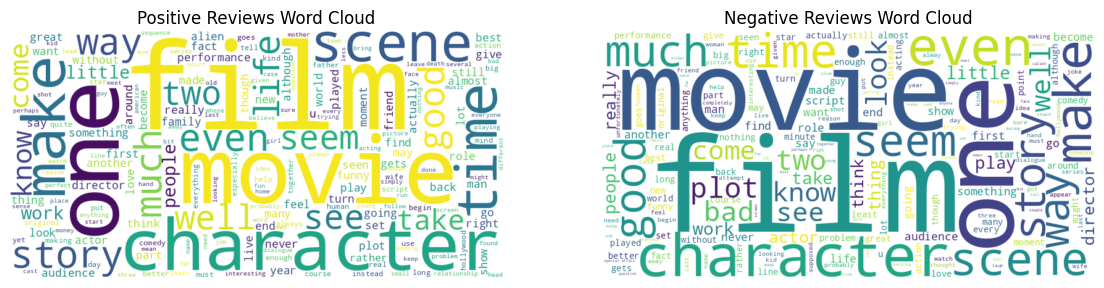

In [15]:
positive_reviews = ' '.join(df[df['sentiment'] == 'pos']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'neg']['review'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


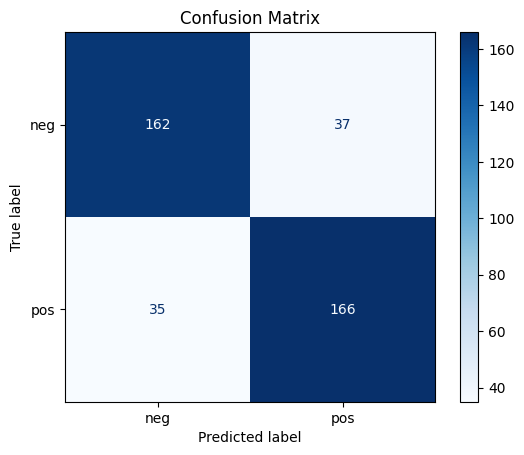

In [16]:
ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, display_labels=['neg', 'pos'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


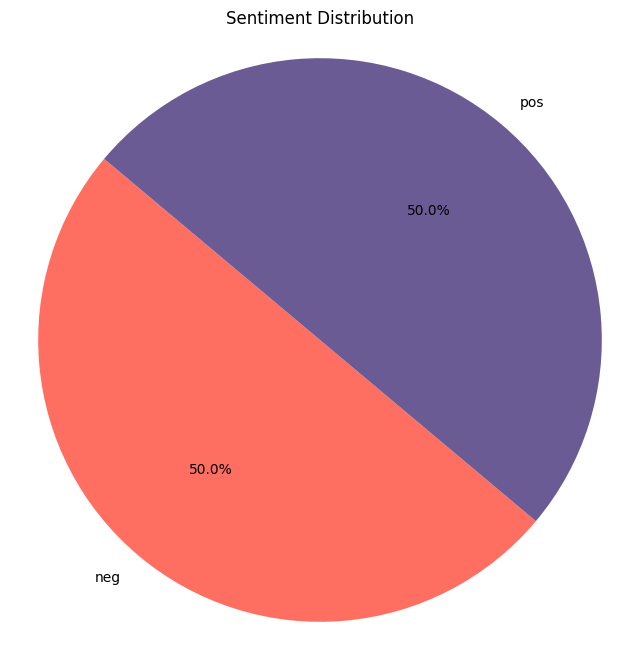

In [17]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF6F61', '#6B5B95'])
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()
